# C2 en moabita

### La estela de Mesa

La estela de Mesa es el (casi) √∫nico texto que se conserva en lengua moabita, una lengua sem√≠tica muy cercana al hebreo b√≠blico que se habl√≥ en el reino de Moab, en la actual Jordania, sobre los siglos X-VIII a.e.c. Se descubri√≥ y descifr√≥ en el siglo XIX y en la actualidad se encuentra en el museo del Louvre.
En este trabajo se analizar√°n las inscripciones (en alfabeto fenicio), sus frecuencias, ra√≠ces, etc.
Si se traduce, se puede a√±adir al curr√≠culum que se tiene un C2 en moabita, dado que es el √∫nico texto que actualmente se conserva en esta lengua.


<center><img src="./img/estela_mesa.jfif"/></center>


Para analizar esta estela voy a utilizar un dataset del Antiguo Testamento, tanto en hebreo como en arameo, as√≠ como un dataset de la estela que crear√© a partir del texto mostrado en la [p√°gina de Wikipedia](https://en.wikipedia.org/wiki/Mesha_Stele).

La justificaci√≥n de usar como comparaci√≥n el texto del Antiguo Testamento es que es la lengua m√°s cercana de la cual se conserva un corpus importante procedente de una regi√≥n cercana en el espacio y el tiempo.

Las hip√≥tesis que se van a poner a prueba son:
- Las letras en protofenicio tienen frecuencia similar a las hebreas y se podr√≠a intentar descifrar el alfabeto solo con frecuencias.
- El lenguaje estela cumple la ley de Zipf.
- Sigue estructura de lengua sem√≠tica (ra√≠ces tril√≠teras, preposiciones y conjunciones encl√≠ticas, ¬øestado constructo?).
- ¬øSe puede descifrar algo con ayuda de un diccionario de hebreo antiguo?

### Los datasets

In [1]:
# Importo las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import squarify
from pywaffle import Waffle
from matplotlib_venn_wordcloud import venn2_wordcloud
from utils.functions_df import *
from utils.functions_text import *
from utils.functions_plot import *

In [2]:
# DataFrame de la Biblia:
biblia = importar_palabras_biblia()
# No hay problema si aparecen unos cuantos avisos de caracteres no iterables o no reconocidos, simplemente avisa de que no puede hacer la transcripci√≥n de las
# ra√≠ces inexistentes en el dataset.

# En caso de que d√© error, importar el csv comentando la l√≠nea anterior y descomentando la siguiente:
#biblia = pd.read_csv('./data/biblia.csv', index_col='Unnamed: 0')

Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no reconocido
Caracter no reconocido
Caracter no reconocido
Caracter no iterable
Caracter no reconocido
Caracter no iterable
Caracter no reconocido
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no reconocido
Caracter no iterable
Caracter no iterable
Caracter no reconocido
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no iterable
Caracter no reconocido
Caracter no reconocido
Caracter no iter

In [3]:
# Texto de la estela de Mesa
texto_estela = importar_mesa()
# En caso de que d√© error, comentar la l√≠nea anterior y descomentar la siguiente:
#texto_estela = pd.read_csv('./data/texto_estela.csv', index_col='Unnamed: 0')

El dataframe de la Biblia consta de 9 columnas:
- strongs_number: Es el n√∫mero de palabra seg√∫n la lista de la obra de Strong. Es un n√∫mero m√°s que el √≠ndice
- word: La palabra en hebreo vocalizada.
- gloss: Trasliteraci√≥n y significados.
- language: H si es hebreo y A si es arameo.
- part_of_speech: Funci√≥n morfol√≥gica de la palabra (nombre, verbo, adjetivo...).
- gender: G√©nero de la palabra.
- occurrences: N√∫mero de veces que aparece la palabra en el Antiguo Testamento.
- first_occurrence: Lugar del Antiguo Testamento donde esta palabra aparece por primera vez.
- root_word: Ra√≠z de la palabra. Esto ser√° de gran inter√©s al final del an√°lisis.
- word_root_occurrence: N√∫mero de veces que aparece esta ra√≠z en el Antiguo Testamento. Ser√° un n√∫mero mayor o igual que occurences.
- transcripcion: Columna que he creado con la transcripci√≥n a alfabeto latino de la ra√≠z de la palabra.

In [4]:
biblia.head()

strongs_number       word  \
0               1        ◊ê÷∏◊ë   
1               2        ◊ê÷∑◊ë   
2               3        ◊ê÷µ◊ë   
3               4        ◊ê÷µ◊ë   
4               5  ◊ê÷≤◊ë÷∑◊í◊™÷º÷∏◊ê   

                                               gloss language part_of_speech  \
0  ab (awb) n-m.\n1. father\n{in a literal and im...        H           noun   
1  ab (ab) n-m.\n1. father\n[(Aramaic) correspond...        A           noun   
2   'eb (abe) n-m.\n1. a green plant\n[from the s...        H           noun   
3  eb (abe) n-m.\n1. fruit\n[(Aramaic) correspond...        A           noun   
4  Abagtha' (ab-ag-thaw') n/p.\n1. Abagtha, a eun...        H    noun proper   

      gender  occurrences first_occurrence root_word  word_root_occurrence  \
0  masculine         1210         GEN 2:24        ◊ê◊ë                1414.0   
1  masculine            9         EZK 4:15        ◊ê◊ë                1414.0   
2  masculine            2         JOB 8:12       ◊ê◊ë◊ë                  13.0   
3  masculine            3         DAN 4:12       ◊ê◊ë◊ë                  13.0   
4  masculine            1         EST 1:10       NaN                   NaN   

  transcripcion  
0            Ab  
1            Ab  
2           Abb  
3           Abb  
4             0

El dataframe de la estela de Mesa consta de dos columnas:
- Texto: Texto de cada l√≠nea de la estela.
- l√≠nea: N√∫mero de l√≠nea en la estela f√≠sica

Esta manera de exponer el dataframe es √∫til para comparar con el texto real, aunque poco √∫til para hacer el an√°lisis.

<center><img src="./img/dibujo_mesa.png"/></center>


In [5]:
texto_estela

Texto  l√≠nea
0             ê§Äê§çê§ä ê§ü ê§åê§îê§è ê§ü ê§Åê§ç ê§ü ê§äê§åê§î¬†?¬†? ê§åê§ãê§ä ê§ü ê§åê§Äê§Å ê§ü ê§Ñê§É      1
1   ê§âê§Åê§çê§â | ê§Äê§Åê§â ê§ü ê§åê§ãê§ä ê§ü ê§èê§ã ê§ü ê§åê§Äê§Å ê§ü ê§îê§ãê§îê§ç ê§ü ê§îê§ï ê§ü ê§Öê§Äê§çê§ä...      2
2   [ê§ïê§â ê§ü ê§Äê§áê§ì ê§ü ê§Äê§Åê§â | ê§Öê§Äê§èê§î ê§ü ê§Ñê§Åê§åê§ï ê§ü ê§Üê§Äê§ï ê§ü ê§ãê§äê§åê§î ê§ü ê§Å...      3
3   ê§îê§è ê§ü ê§äê§â ê§ü ê§Ñê§îê§èê§çê§â ê§ü ê§åê§äê§ã ê§ü ê§Ñê§îê§ãê§äê§ç ê§ü ê§Öê§äê§â ê§ü ê§Ñê§ìê§Äê§çê§â ê§ü ...      4
4   ê§â ê§ü ê§åê§ãê§ä ê§ü ê§âê§îê§ìê§Äê§ã ê§ü ê§Öê§âê§èê§çê§Ö ê§ü ê§Äê§ï ê§ü ê§åê§Äê§Å ê§ü ê§âê§åê§ç ê§ü ê§ìê§Åê§ç...      5
5   ê§ëê§Ñ | ê§Öê§âê§áê§ãê§êê§Ñ ê§ü ê§Åê§çê§Ñ ê§ü ê§Öê§âê§Äê§åê§ì ê§ü ê§Çê§å ê§ü ê§Ñê§Ä ê§ü ê§Äê§èê§çê§Ö ê§ü ê§Ä...      6
6   [ê§Öê§Äê§ìê§Ä ê§ü ê§Åê§Ñ ê§ü ê§Öê§Åê§Åê§ïê§Ñ | ê§Öê§âê§îê§ìê§Äê§ã ê§ü ê§Äê§Åê§É ê§ü ê§Äê§Åê§É ê§ü ê§èê§ãê§å ...      7
7   ê§ë ê§ü ê§åê§Ñê§Éê§Åê§Ä | ê§Öê§âê§îê§Å ê§ü ê§Åê§Ñ ê§ü ê§âê§åê§Ñ ê§ü ê§Öê§áê§ëê§â ê§ü ê§âê§åê§â ê§ü ê§Åê§çê§Ñ...      8
8   ê§Åê§Ñ ê§ü ê§äê§åê§î ê§ü ê§Åê§âê§åê§â | ê§Öê§Äê§Åê§ç ê§ü ê§Äê§ï ê§ü ê§Åê§èê§ãê§åê§èê§ç ê§ü ê§Öê§Äê§èê§î ê§ü ...      9
9   ê§Äê§ï ê§ü ê§íê§ìê§âê§ïê§ç | ê§Öê§Äê§î ê§ü ê§Çê§É ê§ü ê§âê§îê§Å ê§ü ê§Åê§Äê§ìê§ë ê§ü ê§èê§àê§ìê§ï ê§ü ê§åê§è...     10
10  [ ê§îê§ìê§Äê§ã ê§ü ê§Äê§ï ê§ü ê§èê§àê§ìê§ï | ê§Öê§Äê§ãê§ïê§áê§å ê§ü ê§Åê§íê§ì ê§ü ê§Öê§Äê§áê§Üê§Ñ | ê§Öê§Ä...     11
11  [ê§Ñê§íê§ì ê§ü ê§ìê§âê§ï ê§ü ê§ãê§äê§åê§î ê§ü ê§Öê§ãê§åê§Äê§Å | ê§Öê§Äê§îê§Å ê§ü ê§åê§îê§å ê§ü ê§Äê§ï ê§ü ...     12
12  ê§áê§Åê§Ñ ê§ü ê§ãê§êê§çê§â ê§ü ê§äê§åê§î ê§ü ê§Åê§íê§ìê§âê§ï | ê§Öê§Äê§îê§Å ê§ü ê§Åê§Ñ ê§ü ê§Äê§ï ê§ü ê§Äê§î...     13
13  ê§åê§áê§ìê§ï | ê§Öê§âê§Äê§åê§ì ê§ü ê§ãê§â ê§ü ê§äê§åê§î ê§ü ê§ãê§ä ê§ü ê§Äê§áê§Ü ê§ü ê§Äê§ï ê§ü ê§çê§Åê§Ñ ...     14
14  ê§Ñê§ãê§ä ê§ü ê§Åê§ãê§ãê§Ñ ê§ü ê§Öê§Äê§ãê§ïê§áê§å ê§ü ê§Åê§Ñ ê§ü ê§åê§Åê§íê§è ê§ü ê§Ñê§îê§áê§ìê§ï ê§ü ê§èê§É ê§ü...     15
15  [ê§Ü ê§ü ê§Öê§Äê§Ñê§ìê§Ç ê§ü ê§äê§ãê§Ñ ê§ü ê§îê§Åê§èê§ï ê§ü ê§Äê§ãê§êê§ç ê§ü ê§Ç[ê§Å]ê§ìê§ç ê§ü ê§Öê§Çê§ìê§ç...     16
16  [ê§ï ê§ü ê§Öê§ìê§áê§åê§ï | ê§äê§â ê§ü ê§ãê§èê§îê§ïê§ì ê§ü ê§äê§åê§î ê§ü ê§Ñê§áê§ìê§åê§ïê§Ñ | ê§Öê§Äê§íê§á ...     17
17  ê§ãê§â ê§ü ê§âê§Ñê§Öê§Ñ ê§ü ê§Öê§Äê§éê§áê§Å ê§ü ê§Ñê§å ê§ü ê§ãê§êê§çê§â ê§ü ê§äê§åê§î | ê§Öê§åê§ãê§ä ê§ü ê§â...     18
18  [ê§âê§Ñê§ë ê§ü ê§Öê§âê§îê§Å ê§ü ê§Åê§Ñ ê§ü ê§Åê§Ñê§ãê§ïê§áê§åê§Ñ ê§ü ê§Åê§â | ê§Öê§âê§Çê§ìê§îê§Ñ ê§ü ê§äê§åê§î...     19
19  ê§ü ê§Äê§íê§á ê§ü ê§åê§åê§Äê§Å ê§ü ê§åê§Äê§ïê§ç ê§ü ê§Äê§î ê§ü ê§äê§ã ê§ü ê§ìê§îê§Ñ | ê§Öê§Äê§îê§Äê§Ñ ê§ü ...     20
20  ê§ãê§éê§êê§ï ê§ü ê§èê§ã ê§ü ê§Éê§âê§Åê§ç | ê§Äê§çê§ä ê§ü ê§Åê§çê§ïê§â ê§ü ê§íê§ìê§áê§Ñ ê§ü ê§áê§åê§ï ê§ü ê§Ñ...     21
21  ê§Ñê§èê§êê§ã | ê§Öê§Äê§çê§ä ê§ü ê§Åê§çê§ïê§â ê§ü ê§îê§èê§ìê§âê§Ñ ê§ü ê§Öê§Äê§çê§ä ê§ü ê§Åê§çê§ïê§â ê§ü ê§åê§Çê§É...     22
22  ê§çê§ä ê§ü ê§Åê§çê§ïê§â ê§ü ê§Åê§ï ê§ü ê§åê§ãê§ä ê§ü ê§Öê§Äê§çê§ä ê§ü ê§èê§îê§ïê§â ê§ü ê§äê§ãê§Äê§â ê§ü ê§Ñê§Ä...     23
23  ê§Ñê§íê§ì | ê§Öê§Åê§ì ê§ü ê§Äê§ç ê§ü ê§Åê§íê§ìê§Å ê§ü ê§Ñê§íê§ì ê§ü ê§Åê§íê§ìê§áê§Ñ ê§ü ê§Öê§Äê§åê§ì ê§ü ê§ã...     24
24  ê§äê§å ê§ü ê§Äê§î ê§ü ê§Åê§ì ê§ü ê§Åê§Åê§âê§ïê§Ñ | ê§Öê§Äê§çê§ä ê§ü ê§äê§ìê§ïê§â ê§ü ê§Ñê§åê§äê§ìê§ïê§ï ê§ü ...     25
25  ê§ü ê§â] ê§ü ê§âê§îê§ìê§Äê§ã | ê§Äê§çê§ä ê§ü ê§Åê§çê§ïê§â ê§ü ê§èê§ìê§èê§ì ê§ü ê§Öê§Äê§çê§ä ê§ü ê§èê§îê§ïê§â...   

Si se analiza este texto, se ven dos s√≠mbolos que se repiten m√°s de lo habitual: un punto (ê§ü) y una peque√±a l√≠nea vertical (|). El punto separa las palabras y la l√≠nea parece que separa frases. Esto √∫ltimo se discute, hay quien dice que es un s√≠mbolo de entonaci√≥n. En todo caso, en este an√°lisis vamos a asumir que cierra una idea, que es el fin de una frase.

Para continuar con el an√°lisis, se van a utilizar dos dataframes m√°s, uno que separa la estela por palabras y otro por letras:

In [6]:
palabras_estela = palabras_mesa(texto_estela)
letras_estela = letras_mesa(palabras_estela)
# Y, adem√°s, les voy a a√±adir la columna de transcripci√≥n:


In [7]:
palabras_estela

palabra  linea_estela  numero_oracion transcripcion
0       ê§Äê§çê§ä             1               1           Ank
1       ê§åê§îê§è             1               1           m≈°3
2        ê§Åê§ç             1               1            bn
3       ê§äê§åê§î             1               1           km≈°
4       ê§åê§ãê§ä             1               1           mlk
..      ...           ...             ...           ...
290    ê§Åê§âê§åê§â            33              36          bymy
291     ê§Öê§èê§ã            33              36           w3l
292      ê§ìê§Ñ            33              36            rh
293     ê§åê§îê§å            33              36           m≈°m
294      ê§èê§î            33              36            3≈°

[295 rows x 4 columns]

Antes de continuar, se exponen algunos datos cuantitativos referentes a la estela:

In [8]:
lineas = len(texto_estela)
palabras = palabras_estela['palabra'].count()
palabras_unicas = len(palabras_estela['palabra'].unique())
letras = letras_estela['letra'].count()
letras_unicas = len(letras_estela['letra'].unique())
frases = palabras_estela['numero_oracion'].max()

print(f'La estela consta de {lineas} l√≠neas.')
print(f'Se conservan {palabras} palabras en la estela de las cuales {palabras_unicas} son √∫nicas.')
print(f'Se conservan {frases} frases en la estela.')
print(f'La estela tiene {letras} letras en total de las cuales {letras_unicas} son diferentes (sin contar signos de puntuaci√≥n).')

La estela consta de 34 l√≠neas.
Se conservan 295 palabras en la estela de las cuales 192 son √∫nicas.
Se conservan 36 frases en la estela.
La estela tiene 1076 letras en total de las cuales 22 son diferentes (sin contar signos de puntuaci√≥n).


# An√°lisis por letra

A continuaci√≥n vamos a analizar la frecuencia de cada letra en la estela y en el Antiguo Testamento.

Como hemos visto, hay 22 letras diferentes dentro del conjunto total de 1079 letras que se distinguen en la estela. A continuaci√≥n se muestra una tabla con las letras ordenadas por frecuencia:

In [9]:
letras_estela['letra'].value_counts()

letra
ê§Ä    111
ê§Å     95
ê§â     87
ê§å     85
ê§Ñ     74
ê§ì     74
ê§Ö     73
ê§ç     71
ê§ï     69
ê§î     67
ê§ã     63
ê§ä     57
ê§è     40
ê§á     30
ê§í     18
ê§É     17
ê§ë     11
ê§Ç     10
ê§ê      9
ê§é      8
ê§Ü      5
ê§à      2
Name: count, dtype: int64

In [10]:
# Letras ordenadas por porcentaje de frencuencia
((letras_estela['letra'].value_counts(normalize=True)*100)).to_frame().style.bar()

In [11]:
# Transcripci√≥n:
((letras_estela['transcripcion'].value_counts(normalize=True)*100)).to_frame().style.bar()

Ahora vamos a ver los mismos datos para el Antiguo Testamento en hebreo:

In [12]:
letras_biblia = conteo_letras_at(biblia)
letras_biblia['letra_hebrea'].value_counts()

letra_hebrea
◊ï    117910
◊ê    108885
◊î    104833
◊ô     95983
◊û     91427
◊ú     87088
◊®     78020
◊©     73465
◊†     64152
◊ë     54717
◊™     54279
◊¢     53374
◊õ     41970
◊ì     38878
◊ó     30571
◊§     20050
◊ß     18924
◊¶     17033
◊í     12078
◊ñ     10077
◊°      9296
◊ò      7000
Name: count, dtype: int64

Y ahora en porcentaje:

In [13]:
(letras_biblia['letra_hebrea'].value_counts(normalize=True)*100).to_frame().style.bar()

In [14]:
# Transcripci√≥n de ra√≠ces:
(letras_biblia['transcripcion'].value_counts(normalize=True)*100).to_frame().style.bar()

In [15]:
porcentaje_letras_biblia_indice = list(letras_biblia['transcripcion'].value_counts().index)
porcentaje_letras_biblia = list(letras_biblia['transcripcion'].value_counts(normalize=True)*100)
porcentaje_letras_mesa_indice = list(letras_estela['transcripcion'].value_counts().index)
porcentaje_letras_mesa = list(letras_estela['transcripcion'].value_counts(normalize=True)*100)

# Crear diccionario
diccionario_frecuencia_letras = {'letras':[], 'moabita':[], 'hebreo':[]}
for i in porcentaje_letras_mesa_indice:
    diccionario_frecuencia_letras['letras'].append(i)
    diccionario_frecuencia_letras['moabita'].append(porcentaje_letras_mesa[porcentaje_letras_mesa_indice.index(i)])
    diccionario_frecuencia_letras['hebreo'].append(porcentaje_letras_biblia[porcentaje_letras_biblia_indice.index(i)])


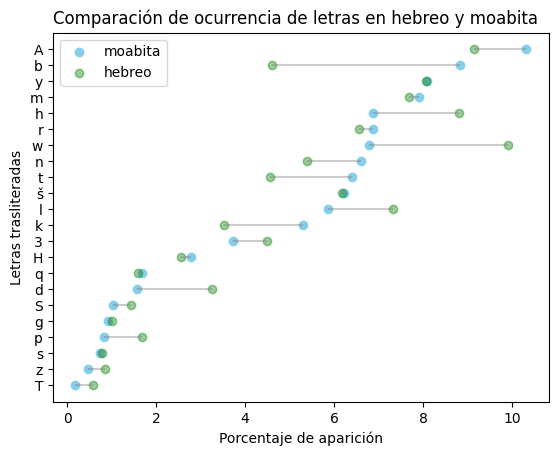

In [16]:

df = pd.DataFrame(diccionario_frecuencia_letras)
 
# Reorder it following the values of the first value:
ordered_df = df.sort_values(by='moabita')
my_range=range(1,len(df.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=ordered_df['moabita'], xmax=ordered_df['hebreo'], color='grey', alpha=0.4)
plt.scatter(ordered_df['moabita'], my_range, color='skyblue', alpha=1, label='moabita')
plt.scatter(ordered_df['hebreo'], my_range, color='green', alpha=0.4 , label='hebreo')
plt.legend()
 
# Add title and axis names
plt.yticks(my_range, ordered_df['letras'])
plt.title("Comparaci√≥n de ocurrencia de letras en hebreo y moabita", loc='left')
plt.xlabel('Porcentaje de aparici√≥n')
plt.ylabel('Letras trasliteradas')

# Show the graph
plt.show()

# Ley de Zipf

La siguiente hip√≥tesis que quiero probar es que la estela de Mesa cumple la Ley de Zipf. La ley de Zipf es una ley emp√≠rica que parece cumplirse aproximadamente en todos los textos de cualquier lengua. Esta ley predice que la probabilidad de ocurrencia de una palabra sigue la siguiente relaci√≥n:

$$P_n \propto \frac{1}{n^a}$$

El valor $P_{n}$ es la probabilidad de ocurrencia de la palabra $n$ veces com√∫n en un texto y $a$ es un n√∫mero que normalmente toma un valor ligeramente superior a 1. ¬øQu√© quiere decir esto? Que, si la palabra m√°s com√∫n del texto aparece 100 veces, la segunda m√°s com√∫n aparecer√° $1/2$ de la primera, es decir, 50. La tercera palabra m√°s com√∫n aparecer√° $1/3$, es decir, unas 33 veces. La cuarta $1/4$, 25. Y as√≠ sucesivamente.

Esto implica que:
$$P_n = K \cdot \frac{1} {n^a} \Rightarrow \log P_n= \log K-\log n^a \Rightarrow \log P_n= \log K - a \log n$$

Es decir, si tomamos logaritmos de las frecuencias y la posici√≥n en el _ranking_ de palabras m√°s comunes, podemos asemejar f√°cilmente la gr√°fica a una recta de pendiente $-a$ que, como hemos dicho, tendr√° un valor cercano a $-1$.

Veamos el resultado para el Antiguo Testamento en hebreo:

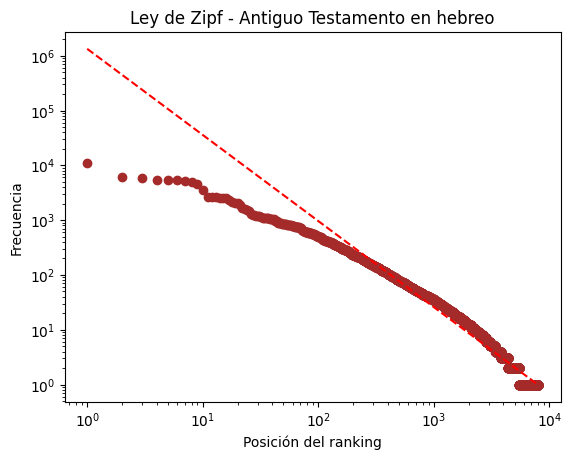

El par√°metro a de la ley de Zipf para el Antiguo Testamento hebreo es -1.57.


In [17]:
m_at_h = dibujar_zipf_at(biblia[biblia['language']=='H'], 'occurrences', 'brown', 'Ley de Zipf - Antiguo Testamento en hebreo')
print(f'El par√°metro a de la ley de Zipf para el Antiguo Testamento hebreo es {round(m_at_h, 2)}.')

Ahora veamos que se cumple en las pocas partes del Antiguo Testamento escritas en arameo:

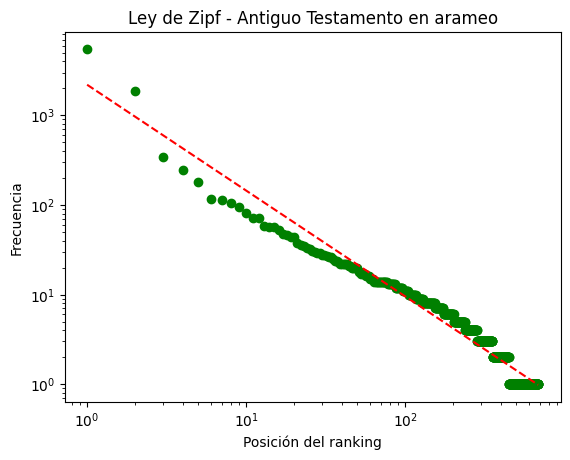

El par√°metro a de la ley de Zipf para el Antiguo Testamento arameo es -1.18.


In [18]:
m_at_a = dibujar_zipf_at(biblia[biblia['language']=='A'], 'occurrences', 'green', 'Ley de Zipf - Antiguo Testamento en arameo')
print(f'El par√°metro a de la ley de Zipf para el Antiguo Testamento arameo es {round(m_at_a, 2)}.')

Y este es el resultado de aplicar este an√°lisis a la estela de Mesa:

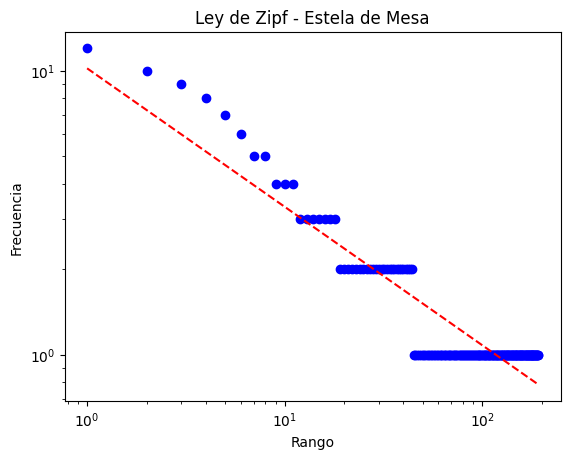

El par√°metro a de la ley de Zipf para el Antiguo Testamento arameo es -0.49.


In [19]:
m_m = dibujar_zipf_mesha(palabras_estela, 'transcripcion', 'blue', 'Ley de Zipf - Estela de Mesa')
print(f'El par√°metro a de la ley de Zipf para el Antiguo Testamento arameo es {round(m_m, 2)}.')

El hecho de que la ley de Zipf se aproxime tan razonablemente bien a lo predicho a pesar de constar de tan pocas palabras, nos hace pensar que es un texto real y no una lengua inventada.

# An√°lisis por palabras

Las lenguas sem√≠ticas tienen una caracter√≠stica com√∫n muy particular: la gran mayor√≠a de sus palabras tienen ra√≠ces tril√≠teras. Esto quiere decir que para un campo sem√°ntico determinado se tiene una ra√≠z de tres letras, consonantes. Para cambiar el significado se cambias las vocales que existen dentro de la ra√≠z. Por ejemplo, de la ra√≠z √°rabe slm est√° la palabra 'salam' (paz), sallam (saludar), islam (aceptaci√≥n), muslim (el que acepta), etc. Esto ocurre con todas las palabras.

Para comprobar si la lengua de la estela de Mesha es sem√≠tica, se va a comprobar si hay indicios de que la mayor√≠a de palabras sean de ra√≠z tril√≠tera. Pero, ¬°ojo! ¬°Eso no quiere decir que todas las palabras vayan a tener solo tres letras! Normalmente, tanto los art√≠culos como las preposiciones y conjunciones se aglutinan, es decir, se escriben junto a la siguiente palabra. Dicho de otro modo, no se escribe 'el hombre fue a Barcelona y volvi√≥' sino que se escribir√≠a 'elhombre fue aBarcelona yvolvi√≥'.

As√≠ pues, vamos a comprobar si encontramos alg√∫n patr√≥n de comienzo o final y a relacionarlo con el hebreo:

In [20]:
#Las palabras m√°s comunes sin tener en cuenta inicios son:
palabras_estela['transcripcion'].value_counts()[:10]

transcripcion
At       12
km≈°      10
wAnk      9
bnty      8
bh        7
ky        6
Ank       5
mlk       5
mAb       4
y≈°rAl     4
Name: count, dtype: int64

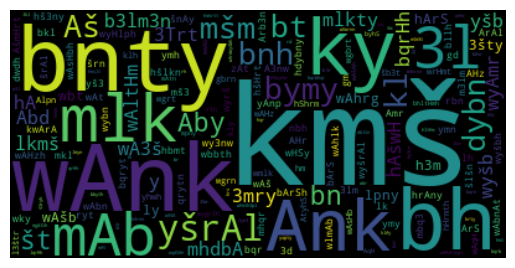

In [21]:
#Dibujar wordcloud de Mesha


text = ' '.join(list(palabras_estela['transcripcion']))

# Create and generate a word cloud image:
wordcloud = WordCloud(collocations=False).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

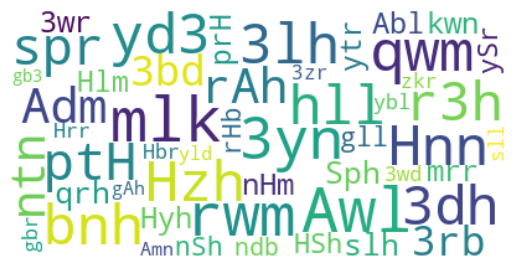

In [22]:
#Lo mismo para el hebreo:
texto_hebreo = ' '.join([i for i in list(biblia[biblia['language'] == 'H']['transcripcion']) if i != 0])

# Create and generate a word cloud image:
wordcloud = WordCloud(collocations=False, max_font_size=50, max_words=50, background_color="white").generate(texto_hebreo)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

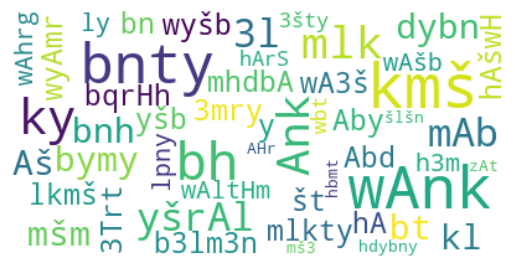

In [23]:
#Nube de palabras compartidas:
heb = np.array(texto_hebreo.split())
mesha = text.split()

wordcloud = WordCloud(collocations=False, max_font_size=50, max_words=50, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Veamos qu√© proporci√≥n hay de palabras tril√≠teras y de otro tipo de palabras:

In [24]:
lista_palabras_mesa = text.split()
una = 0
dos = 0
tres = 0
cuatro = 0
cinco = 0
otra = 0
for i in lista_palabras_mesa:
    if len(i) == 1:
        una += 1
    elif len(i) == 2:
        dos += 1
    elif len(i) == 3:
        tres += 1
    elif len(i) == 4:
        cuatro += 1
    elif len(i) == 5:
        cinco += 1
    else:
        otra += 1
lista = [una, dos, tres, cuatro, cinco, otra]
root_size = pd.DataFrame({'size':lista, 'tipo':['unil√≠tera', 'bil√≠tera', 'tril√≠tera', 'tetral√≠tera', 'pental√≠tera', 'otras']})


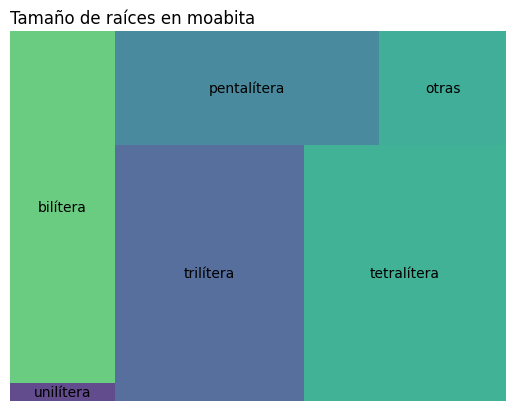

In [25]:

squarify.plot(sizes=root_size['size'], label=root_size['tipo'], alpha=0.85)
plt.axis('off')
plt.title("Tama√±o de ra√≠ces en moabita", loc='left')
plt.show()

In [26]:
#Ahora lo mismo para el hebreo:

¬øEsto es verdad? No, porque hay que fijarse en los art√≠culos, encl√≠ticos, etc.

Comienzos de palabra:

In [27]:
# Las primeras letras m√°s comunes son:
palabras_estela['transcripcion'].str[0].value_counts()

transcripcion
w    61
b    49
A    38
m    27
k    24
h    23
3    16
y    15
l    13
≈°     9
d     5
r     5
g     3
H     2
q     2
n     1
z     1
Name: count, dtype: int64

In [28]:
# Dos letras:
palabras_estela['transcripcion'].str[:2].value_counts()

transcripcion
wA    32
bn    13
At    13
wy    11
km    10
      ..
Al     1
gb     1
wr     1
l3     1
rh     1
Name: count, Length: 106, dtype: int64

In [29]:
#Comienzos de palabra por w seguidas de ra√≠z tril√≠tera:
import re
patron = r'\b\w{3}'

def buscar_patron_w(texto):
    patron = r'\bw\w{3,9}\b'
    palabras_encontradas = re.findall(patron, texto)
    return palabras_encontradas

texto = list(palabras_estela['transcripcion'].apply(buscar_patron_w))
palabras_w = [item for item in texto if not (isinstance(item, list) and not item)]
print(len(palabras_w))

def buscar_patron_b(texto):
    patron = r'\bb\w{3,9}\b'
    palabras_encontradas = re.findall(patron, texto)
    return palabras_encontradas

texto = list(palabras_estela['transcripcion'].apply(buscar_patron_b))
palabras_b = [item for item in texto if not (isinstance(item, list) and not item)]
print(len(palabras_b))

def buscar_patron_h(texto):
    patron = r'\bh\w{3,9}\b'
    palabras_encontradas = re.findall(patron, texto)
    return palabras_encontradas

texto = list(palabras_estela['transcripcion'].apply(buscar_patron_h))
palabras_h = [item for item in texto if not (isinstance(item, list) and not item)]
print(len(palabras_h))

resto_de_letras = palabras - len(palabras_h) - len(palabras_b) - len(palabras_w)

52
28
16


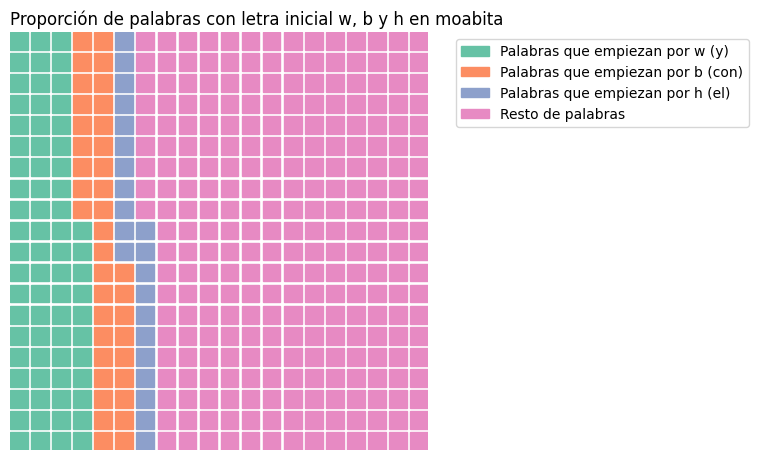

In [30]:
# create simple dummy data
dic_inicio_palabras = {'Palabras que empiezan por w (y)': len(palabras_w), 'Palabras que empiezan por b (con)': len(palabras_b), 'Palabras que empiezan por h (el)': len(palabras_h), 'Resto de palabras': resto_de_letras}

# Basic waffle
plt.figure(
  FigureClass=Waffle,
  rows=20,
  columns=20,
  values=dic_inicio_palabras,
  legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
)
plt.title("Proporci√≥n de palabras con letra inicial w, b y h en moabita", loc='left')
plt.show()

Este resultado es muy interesante porque muchas de estas palabras son palabras muy comunes en hebreo y √°rabe. 

- w: La primera letra m√°s com√∫n es 'w', que en ambos idiomas es la conjunci√≥n 'y'. Se usa mucho m√°s que en castellano, es com√∫n utilizarla como enlace de frases o incluso para separar dos frases

- b: Significa 'con' tanto en hebreo como en √°rabe.

- h: Es el art√≠culo en hebreo.

Parece que hay muchos rasgos que comparten.

In [31]:
# A ver alg√∫n final:
print(palabras_estela['transcripcion'].str[-1].value_counts()[:10])

transcripcion
y    44
t    40
h    37
n    29
k    22
≈°    21
l    19
r    17
m    15
b    14
Name: count, dtype: int64


In [32]:
# Alg√∫n final doble
palabras_estela['transcripcion'].str[-2:].value_counts()

transcripcion
At    16
ty    14
nk    14
m≈°    12
bh    11
      ..
Hb     1
hm     1
Sh     1
r≈°     1
rh     1
Name: count, Length: 102, dtype: int64

Si se compara con una gram√°tica de hebreo, se reconocen enseguida los tres finales m√°s comunes:
- y: pronombre posesivo de primera persona (mi). En lenguas sem√≠ticas se dir√≠a 'libroy' para decir 'mi libro'.
- t: marca del femenino.
- h: pronombre posesivo de tercera persona (su). En lenguas sem√≠ticas se dir√≠a 'libroh' para decir 'su libro'.

In [33]:
def buscar_patron_y(texto):
    patron = r'\b\w{3,9}y\b'
    palabras_encontradas = re.findall(patron, texto)
    return palabras_encontradas

texto = list(palabras_estela['transcripcion'].apply(buscar_patron_y))
palabras_y = [item for item in texto if not (isinstance(item, list) and not item)]
print(len(palabras_y))

def buscar_patron_t(texto):
    patron = r'\b\w{3,9}t\b'
    palabras_encontradas = re.findall(patron, texto)
    return palabras_encontradas

texto = list(palabras_estela['transcripcion'].apply(buscar_patron_t))
palabras_t = [item for item in texto if not (isinstance(item, list) and not item)]
print(len(palabras_t))

28
15


Ahora vamos a hacer una gr√°fica que muestre de nuevo palabras:

In [34]:
palabras_estela_lista = text.split()
w = 0
h = 0
b = 0
y_final = 0
t_final = 0
h_final = 0
posibles_raices_moabita = []
for i in palabras_estela_lista:
    palabra = i
    if len(palabra)>3:
        if i[-1] == 'y':
            palabra = palabra[:-1]
            y_final += 1
        elif i[-1] == 't':
            palabra = palabra[:-1]
            t_final += 1
    if len(palabra)>3:
        if i[0] == 'w':
            palabra = palabra[1:]
            w += 1
        elif i[0] == 'b':
            palabra = palabra[1:]
            b += 1
        elif i[0] == 'h':
            palabra = palabra[1:]
            h += 1
    posibles_raices_moabita.append(palabra)
        
        

print(posibles_raices_moabita)

['Ank', 'm≈°3', 'bn', 'km≈°', 'mlk', 'mAb', 'dybn', 'Aby', 'mlk', '3l', 'mAb', '≈°l≈°n', '≈°t', 'Ank', 'mlkt', 'AHr', 'Aby', 'A3≈°', 'hbm', 'zAt', 'lkm≈°', 'qrHh', 'bns', 'y≈°3', 'ky', '≈°3n', 'mkl', '≈°lkn', 'wky', 'rAn', 'bkl', '≈°nA', '3mr', 'mlk', 'y≈°rAl', 'y3nw', 'At', 'mAb', 'ymn', 'rbn', 'ky', 'yAnp', 'km≈°', 'ArSh', 'yHlph', 'bnh', 'yAmr', 'gm', 'hA', 'A3nw', 'At', 'mAb', 'bym', 'Amr', 'kwArA', 'bh', 'bbth', 'y≈°rAl', 'Abd', 'Abd', '3lm', 'yr≈°', '3mr', 'At', 'ArS', 'mhdbA', 'y≈°b', 'bh', 'ymh', 'wHS', 'ymy', 'bnh', 'Arb3n', '≈°t', 'y≈°bh', 'km≈°', 'bym', 'Abn', 'At', '3lm3n', 'A3≈°', 'bh', 'A≈°wH', 'AbnA', 'qrytn', 'wA≈°', 'gd', 'y≈°b', 'ArS', '3Tr', 'm3lm', 'ybn', 'lh', 'mlk', 'y', '≈°rAl', 'At', '3Tr', 'AltHm', 'bqr', 'AHzh', 'Ahrg', 'At', 'kl', 'h3m', 'mhqr', 'ryt', 'lkm≈°', 'lmAb', 'A≈°b', 'm≈°m', 'At', 'ArAl', 'dwdh', 'AsHbh', 'lpn', 'km≈°', 'qry', 'A≈°b', 'bh', 'At', 'A≈°', '≈°rn', 'wAt', 'A≈°mHr', 'yAmr', 'ly', 'km≈°', 'lk', 'AHz', 'At', 'nbh', '3l', 'y≈°rAl', 'Ahlk', 

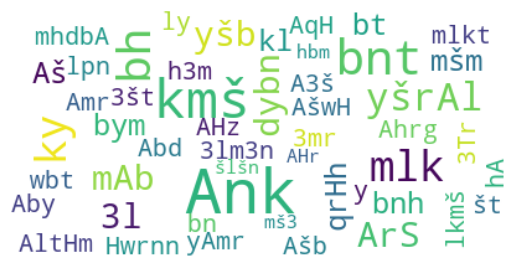

In [35]:
# Nuevo wordcloud:
wordcloud = WordCloud(collocations=False, max_font_size=50, max_words=50, background_color="white").generate(' '.join(posibles_raices_moabita))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


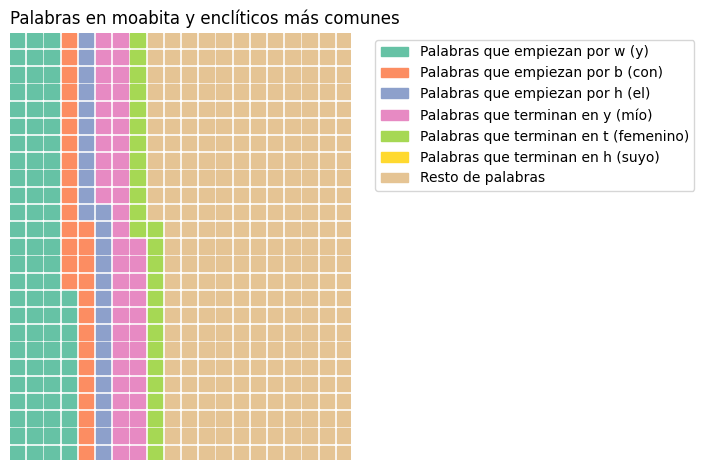

In [36]:
# Waffle m√°s elegante:
dic_posibles_raices = {'Palabras que empiezan por w (y)': w, 'Palabras que empiezan por b (con)': b, 'Palabras que empiezan por h (el)': h,
                        'Palabras que terminan en y (m√≠o)': y_final, 'Palabras que terminan en t (femenino)': t_final,
                        'Palabras que terminan en h (suyo)': h_final,'Resto de palabras': len(posibles_raices_moabita)-w-h-b-y_final-t_final-h_final}

# Basic waffle
plt.figure(
  FigureClass=Waffle,
  rows=25,
  columns=20,
  values=dic_posibles_raices,
  legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
)
plt.title("Palabras en moabita y encl√≠ticos m√°s comunes", loc='left')
plt.show()

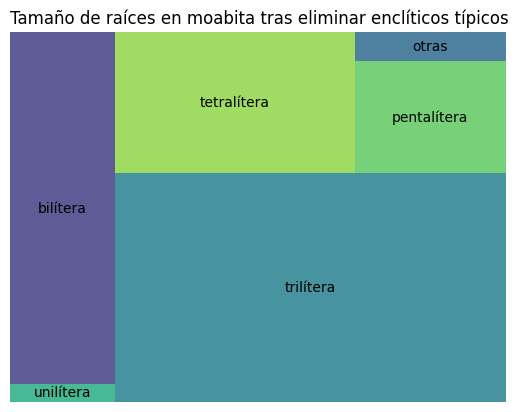

In [37]:

una = 0
dos = 0
tres = 0
cuatro = 0
cinco = 0
otra = 0
for i in posibles_raices_moabita:
    if len(i) == 1:
        una += 1
    elif len(i) == 2:
        dos += 1
    elif len(i) == 3:
        tres += 1
    elif len(i) == 4:
        cuatro += 1
    elif len(i) == 5:
        cinco += 1
    else:
        otra += 1
lista = [una, dos, tres, cuatro, cinco, otra]
root_size = pd.DataFrame({'size':lista, 'tipo':['unil√≠tera', 'bil√≠tera', 'tril√≠tera', 'tetral√≠tera', 'pental√≠tera', 'otras']})

squarify.plot(sizes=root_size['size'], label=root_size['tipo'], alpha=0.85)
plt.axis('off')
plt.title("Tama√±o de ra√≠ces en moabita tras eliminar encl√≠ticos t√≠picos", loc='left')
plt.show()

Llegado a este punto, ¬øser√≠a posible traducir esta estela a partir del hebreo? Para ver cu√°ntas ra√≠ces tienen en com√∫n, vamos a dibujar un gr√°fico:

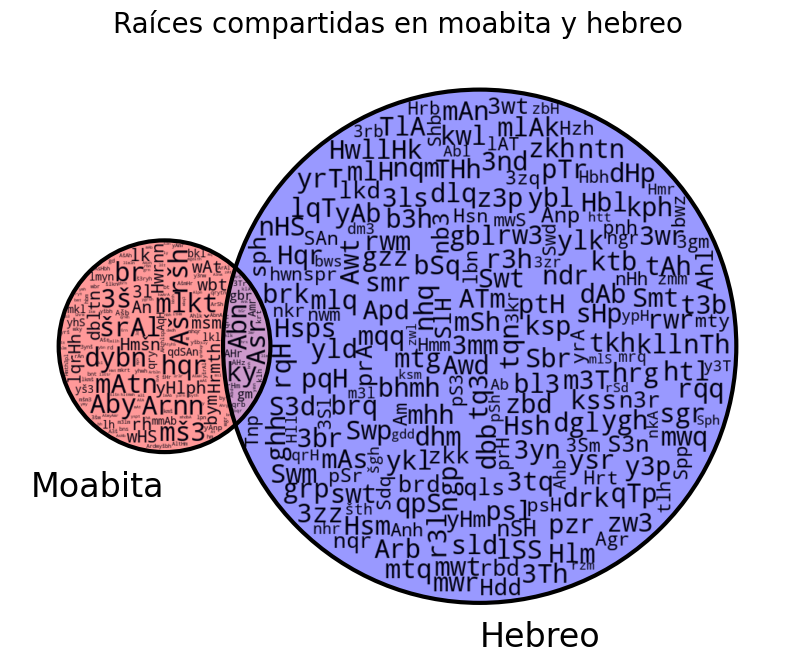

In [38]:


fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Ra√≠ces compartidas en moabita y hebreo', fontsize=20)

v = venn2_wordcloud([set(posibles_raices_moabita), set(biblia[(biblia['language'] == 'H') & (biblia['transcripcion'] != 0)]['transcripcion'])],
                    ax=ax, set_labels=['Moabita', 'Hebreo'])# add color

v.get_patch_by_id('10').set_color('red')
v.get_patch_by_id('10').set_alpha(0.4)
v.get_patch_by_id('01').set_color('blue')
v.get_patch_by_id('01').set_alpha(0.4)
v.get_patch_by_id('11').set_color('purple')
v.get_patch_by_id('11').set_alpha(0.4)

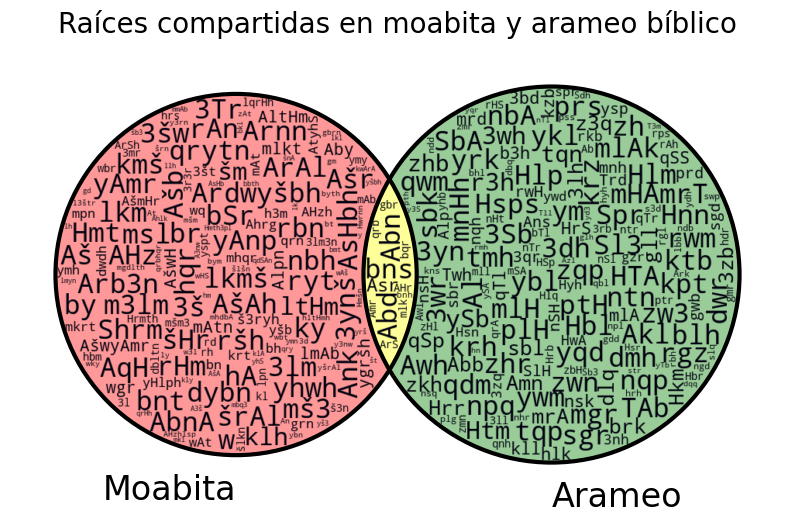

In [39]:
# Lo mismo para el arameo:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Ra√≠ces compartidas en moabita y arameo b√≠blico', fontsize=20)

v = venn2_wordcloud([set(posibles_raices_moabita), set(biblia[(biblia['language'] == 'A') & (biblia['transcripcion'] != 0)]['transcripcion'])],
                    ax=ax, set_labels=['Moabita', 'Arameo'])# add color

v.get_patch_by_id('10').set_color('red')
v.get_patch_by_id('10').set_alpha(0.4)
v.get_patch_by_id('01').set_color('green')
v.get_patch_by_id('01').set_alpha(0.4)
v.get_patch_by_id('11').set_color('yellow')
v.get_patch_by_id('11').set_alpha(0.4)

A primera vista se podr√≠a pensar que las ra√≠ces que comparten son muy pocas. Pero hay que tener en cuenta dos puntos:
1. Las palabras compartidas son las m√°s comunes.
2. Muchas de las ra√≠ces no compartidas se acercan mucho fon√©ticamente as√≠ que, aunque no sea exactamente igual, un ling√ºista podr√≠a reconocer el patr√≥n (por ejemplo, de sonido T a sh en el n√∫mero 30, shalasha)
3. Hay m√°s lenguas sem√≠ticas que se conocen (ugar√≠tico, acadio, eti√≥pico, √°rabe...) y podr√≠an tener m√°s ra√≠ces en com√∫n.

De hecho, ling√ºistas expertos tradujeron esta estela en el siglo XIX a pesar de las pocas ra√≠ces que tienen en com√∫n.

¬øIntentamos traducir la primera frase? Para esto hay que utilizar este diccionario y el usuario debe introducir el significado que mejor le suene en funci√≥n de los significados de las ra√≠ces de palabras hebreas similares.

In [40]:
# Para probar este traductor interactivo, descomenta la siguiente l√≠nea: 
#diccionario(biblia, palabras_estela)